<a href="https://colab.research.google.com/github/gitmystuff/DTSC5502/blob/main/Module_04/Module_4_Activity_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis Testing and Test of Means

* gitmystuff/DTSC5502/Module 04
* Make a copy to drive
* Edit title
* Submit shared link to Canvas



Sources:
* Bernoulli's Fallacy by Aubrey Clayton
* How Data Happened by Chris Wiggens and Matthew L. Jones
* End of Average by Todd Rose

## Stroll Down History Lane

* Cardona (Games of Chance) 1501 - 1576
* Galileo (Astronomy) 1564 - 1642
* Pascal (Binomials) - the expansion of $(a + b)^n$ 1623 - 1662

### Jacob Bernoulli (1655 - 1705)

* Ars Conjectandi: book on combinatrics and mathematical probability
* Gambling, Games of Chance, and Election Fraud
* Law of Large Numbers (law of small numbers) - In mathematics, the "strong law of small numbers" is the humorous law that proclaims, in the words of Richard K. Guy: There aren't enough small numbers to meet the many demands made of them.
* Urn drawing examples


In [ ]:
import numpy as np

np.random.seed(42)
data = np.random.randint(0, 5000, 5000)
print('Population mean: ', np.mean(data))

for i in [5, 50, 500, 5000, 50000, 500000]:
  print(f'Sample mean for {i} is {np.mean(np.random.choice(data, i))}')

Population mean:  2526.474
Sample mean for 5 is 2449.8
Sample mean for 50 is 2749.86
Sample mean for 500 is 2544.07
Sample mean for 5000 is 2557.3138
Sample mean for 50000 is 2526.17414
Sample mean for 500000 is 2527.462194


### John Arbuthnot (1667 - 1735)

* Queen Anne's Physician
* Sex ratio at birth boy 105: girl 100
* Every year, more boys born
* If the probability of birth was equal, the probability of the outcome would be $1/2^{82}$ which is 2.068 preceded by 25 zeros
* 1710 paper An Argument for Divine Providence

### Abraham de Moivre (1667 - 1754)

* Doctrine of Chances
* Astronomy
* Central Limit Theorem (with Laplace)
* First to come up with the normal distribution as a way to approximate the binomial distributions required by Bernoulli's urn-drawing problems
* Normal curve, binomial distribution, and gambling
* $P(k) = {_nC_k} p^k (1 - p)^{(n-k)}$
* Probability of k equals the combimation of n choose k, times (sample space?) of p to the power of k times the compliment of p to the power of n - k
* Example: $(a + b)^3 = a^3 + 3a^2b + 3ab^2 + b^3$
* Pascal's Triangle - https://www.mathsisfun.com/algebra/binomial-theorem.html


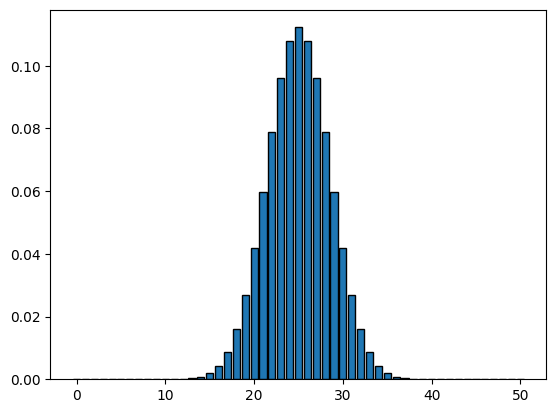

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import binom

n, p = 50, 0.5 # equal color of balls in urn

values = list(range(n + 1))
dist = [binom.pmf(k, n, p) for k in values]

plt.bar(values, dist, edgecolor='black')
plt.show()

If you have 50 trials, the probability k = 20 is a little more than 4%, the probability of k = 25 is about 11%

In [ ]:
binom.pmf(25, 50, 0.5)

0.11227517265921712

### Thomas Bayes (1702 - 1761)

* Means for revising predictions in light of relevant evidence, also know as conditional probability or inverse probability
* All probability is conditional given our assumptions
* Discussed in a later module

### Pierre-Simon Laplace (1749 - 1827)

* Promotes Bayes' theorem
* Celestial mechanics
* Proved the first general central limit theorem
* The central limit theorem (CLT) establishes that, in many situations, for independent and identically distributed random variables, the sampling distribution of the standardized sample mean tends towards the standard normal distribution even if the original variables themselves are not normally distributed.

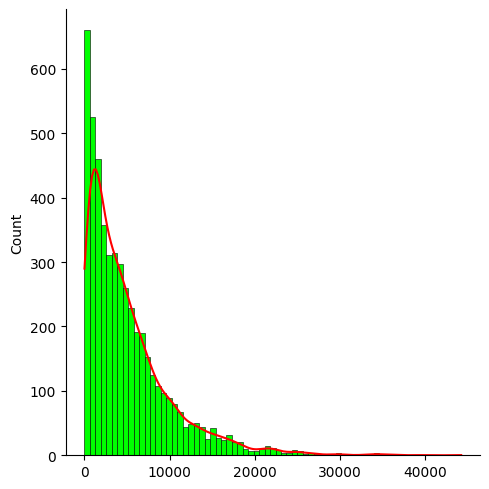

In [ ]:
import numpy as np
import seaborn as sns

# gamma models continuous positive skewed random variables
# non-parametric kernel density estimation is a smoothing technique for probability density estimation
data = np.random.gamma(1, 5000, 5000)
sns.displot(data, kde=True, color='red', facecolor='lime');

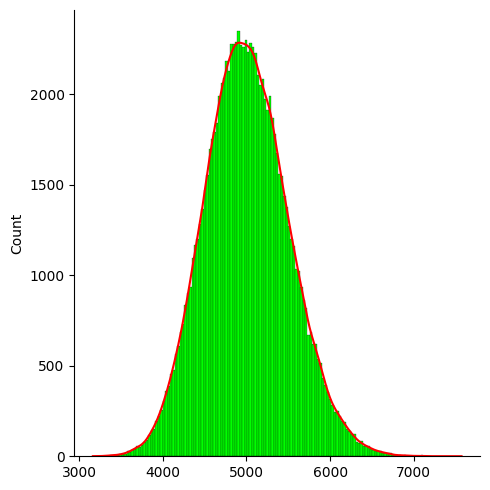

In [ ]:
# list comprehension
import numpy as np
import seaborn as sns

means = [np.random.choice(data, 100).mean() for _ in range(100000)]
sns.displot(means, kde=True, color='red', facecolor='lime');

### Carl Friedrich Gauss (1777 - 1855)

* Astronomy
* The Gaussian (Normal) Distribution
* Formula (Frequency Curve, Laplace): $f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}\large{e^\frac{-(x-\mu)^2}{2\sigma^2}}$
* Parameters: $\mu$, and $\sigma$
* Large errors are rarer than small errors
* MSE: $\frac{\sum(y-\hat{y})^2}{n}$

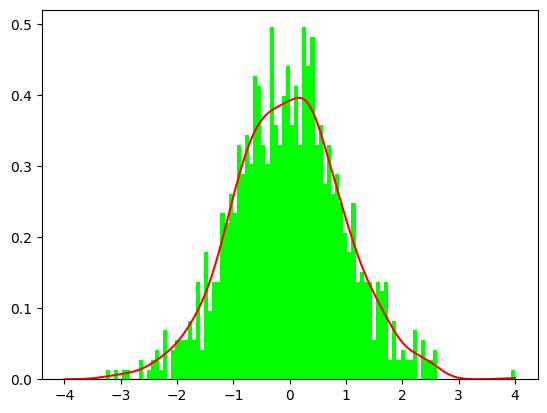

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

data = stats.norm.rvs(size=1000)
data.sort()

parameters = stats.norm.fit(data)
mu, sigma = parameters

kde = stats.gaussian_kde(data)
plt.hist(data, bins=100, density=True, color='lime')

x = np.linspace(-4, 4, 1000)
plt.plot(x, kde(x), color='red');

### Adolph Quetelet (1796 - 1874)

If there's no such thing as an average body or brain, how did society come to place such unquestioning faith in the idea of an average person? (p23)

* Astronomy
* The Average Man (concept of average was not completely obvious)
* Body Mass Index
* A new scientific politics based on data about people
* Bridged the gap between astronomy and sociology
* The average man was the best of things
* Everything differing from the Average Man's proportions and condition, would constitute deformity and disease (p29)
* There is a power tendency to simplify the way we think about people by imagining all members of a group act according to a set of shared characteristics (p29)
* Quetelet's invention of the Average Man marked the beginning of the Age of Average. It represented the moment when the average became normal, the individual became error and stereotypes were validated with the imprint of science (p31)
* Shuffling a deck of cards 52!
* The probability of you

Sources
* End of Average by Todd Rose
* https://medium.com/montcrest-moments/are-you-ready-for-the-end-of-average-f18ac6ed79d8



#### Average (Mean)

$\mu = \frac{1}{N} \sum_{i=1}^{N} x_i$

In [ ]:
# average
import numpy as np

x = [1, 2, 3, 4, 5, 6]
N = len(x)
1/N * np.sum(x)

3.5

#### Expected Value

$E[X] = \sum_{i=1}^{\infty} x_ip_i$

What would be the expected average rolling dice?

In [ ]:
1 * 1/6 + 2 * 1/6 + 3 * 1/6 + 4 * 1/6 + 5 * 1/6 + 6 * 1/6

3.5

### Modern / Classical Statistics

We are moving from gambling and the heavens to social norms

### Eugenics and Ethnic Cleansing

* Eugincs: the selection of desired heritable characteristics in order to improve future generations
* Ethnic Cleansing: the systematic forced removal of ethnic, racial, and religious groups from a given area, with the intent of making a region ethnically homogenous

### Britain's Influence

### Nationalism

### Nazis (Facism)


### Francis Galton (1822 - 1911)

* Eugenics influenced by cousin Charles Darwin and Natural Selection
* England's Crystal Palace
* The average man was a regression vs the Quetelet's ideal average
* Regression: What we call “linear regression” today was named for an observation that genes “regressed” to some average. It was a way of saying, “don’t mix with those people, or your children will regress and make society worse for it.”
* Correlation: Literally from co-relation, or how related two “desirable” traits were in a population. You might guess which traits eugenicists thought made one desirable.
* The Galton Board
* Plinko
* https://www.youtube.com/watch?v=3m4bxse2JEQ

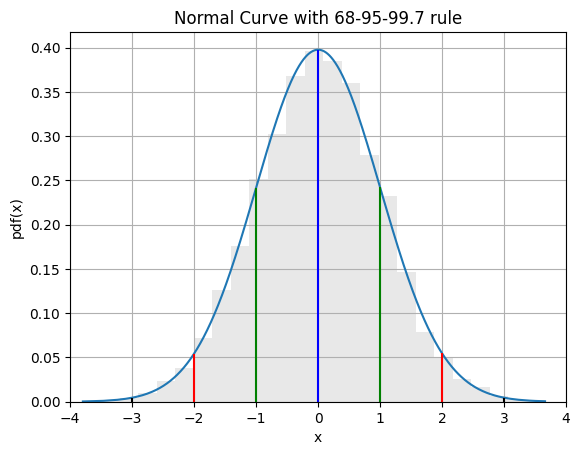

In [ ]:
# the normal curve
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

X = stats.norm.rvs(size=10000)
X.sort()

parameters = stats.norm.fit(X)
mu, sigma = parameters

fig, ax = plt.subplots()
ax.plot(X, stats.norm.pdf(X, loc=mu, scale=sigma))
ax.hist(X, bins=25, density=True, color='lightgray', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_xlim(-4, 4)
ax.grid(True)

plt.vlines(x=-3, ymin=0, ymax=stats.norm.pdf(-3, loc=mu, scale=sigma), color='black')
plt.vlines(x=-2, ymin=0, ymax=stats.norm.pdf(-2, loc=mu, scale=sigma), color='red')
plt.vlines(x=-1, ymin=0, ymax=stats.norm.pdf(-1, loc=mu, scale=sigma), color='green')
plt.vlines(x=0, ymin=0, ymax=stats.norm.pdf(0, loc=mu, scale=sigma), color='blue')
plt.vlines(x=1, ymin=0, ymax=stats.norm.pdf(1, loc=mu, scale=sigma), color='green')
plt.vlines(x=2, ymin=0, ymax=stats.norm.pdf(2, loc=mu, scale=sigma), color='red')
plt.vlines(x=3, ymin=0, ymax=stats.norm.pdf(3, loc=mu, scale=sigma), color='black')

plt.title('Normal Curve with 68-95-99.7 rule')
plt.show()

### Karl Pearson (1857 - 1936)

* Pearson's Correlation Coefficient (r)
* Between -1 and 1 and measures strength and direction of the relationship between two variables
* Strong positive correlation: $r > .5$
* Strong negative correlation: $r < -.5$
* Zero = no correlation
* An inferential statistic: can be used to test statistical hypotheses
* Credited with the p-value

#### Correlation

* Univariate and Bivariate Data

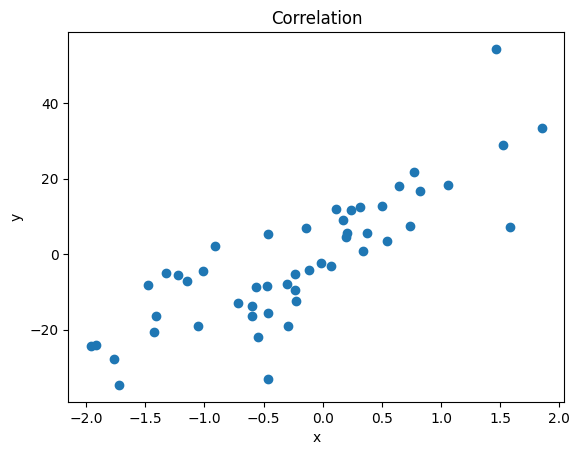

In [ ]:
# bivariate data
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

x, y = make_regression(n_samples=50, n_features=1, noise=10, random_state=42)
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Correlation');

In [ ]:
# numpy and stats correlation coefficient
import numpy as np
from scipy import stats

x_flat = x.reshape((-1, 1)).flatten()

print('Numpy: ', np.corrcoef(x_flat, y))
print('Scipy: ', stats.pearsonr(x_flat, y))

Numpy:  [[1.         0.82783617]
 [0.82783617 1.        ]]
Scipy:  PearsonRResult(statistic=0.8278361699772883, pvalue=1.2198574877172877e-13)


### Ronald Fisher (1890 - 1962)


* Smoking - https://www.famousscientists.org/ronald-fisher/
* Ronald Fisher died aged 72 on July 29, 1962, in Adelaide, Australia following an operation for colon cancer. With bitter irony, we now know that the likelihood of getting this disease increases in smokers
* Formalized p-value concept : the probability under the assumption of no effect or no difference (null hypothesis), of obtaining a result equal to or more extreme than what was actually observed
* The P stands for probability and measures how likely it is that any observed difference between groups is due to chance
* Significance level: arbitrary conventional use of the 5% level as the max acceptable probability for determining statistical significance
* Statistical significance: a measure of the probability of the null hypothesis being true within an acceptable level of uncertainty

#### Null Hypothesis

The null hypothesis states that there is no significant difference between two groups and any observed difference is due to sampling or experimental error. The status quo. Chance

#### For Example

Our null hypothesis is that there is no difference between groups, the mean of a population compared to some observed sample mean ($\bar{x}$), or $H: \mu = \bar{x}$ with an alpha level of 0.05 (or about two z-scores from the mean which represents 95% of the area under the curve)

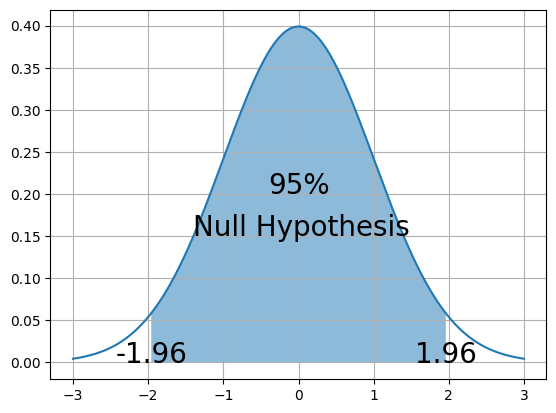

In [ ]:
# shaded area is our null hypothesis
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

x = np.arange(-3, 3, 0.001)

pdf = stats.norm.pdf(x,loc=0,scale=1)
plt.plot(x, pdf)

z = 1.96 # 95% CI
lci = -z
uci = z

plt.fill_between(x, pdf, where=(lci < x) & (x < uci), alpha=0.5)
plt.text(lci, 0, lci, ha='center', fontsize=20)
plt.text(uci, 0, uci, ha='center', fontsize=20)
plt.text(-0.4, .2, f'95%', fontsize=20)
plt.text(-1.4, .15, f'Null Hypothesis', fontsize=20)
plt.grid(True)

### Confidence Intervals

Confidence intervals are used to express how likely $\bar{x}$ falls within a range of values. If the hypothesized value falls in the tail outside of the one-directional area of interest, we reject the null hypothesis. If our hypothesized value falls outside of the two-tailed interval, we reject the null hypothesis.

In frequentist statistics, a confidence interval (CI) is a range of estimates for an unknown parameter. A confidence interval is computed at a designated confidence level. The 95% level is most common, but other levels (such as 90% or 99%) are sometimes used. The confidence level represents the long-run proportion of correspondingly computed intervals that end up containing the true value of the parameter. For example, out of all confidence intervals computed at the 95% level, 95% of them should contain the parameter's true value.

https://en.wikipedia.org/wiki/Confidence_interval

Confidence intervals help to measure the uncertainty in a sample and how well the CI represents the actual value of the population

* $z = \frac{x - \bar{x}}{\sigma}$
* standard error = $\frac{s}{\sqrt{n}}$
* intervals = $\bar{x} \pm z\frac{s}{\sqrt{n}}$

### P-Value

The P value is defined as the probability under the assumption of no effect or no difference (null hypothesis), of obtaining a result equal to or more extreme than what was actually observed. The P stands for probability and measures how likely it is that any observed difference between groups is due to chance.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4111019/

"The p value is the evidence against a null hypothesis. The smaller the p-value, the stronger the evidence that you should reject the null hypothesis."

Stephanie Glen. "P-Value in Statistical Hypothesis Tests: What is it?" From StatisticsHowTo.com: Elementary Statistics for the rest of us! https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/p-value/

The lower the p value, the more predictive the feature is in principle. When we run tests, we are often concerned with the alpha level to help us reject or fail to reject the null hypothesis. The alpha level is (1 - our confidence interval), so if we wanted to have a confidence level of 95% we would use a alpha value of 5%. If our p value is less than the alpha value then the evidence points to rejecting the null hypothesis. If our p values is less than the alpha value then we can say our results are statistcally significant. We found something that is probably not the result of chance. But beware.

### Alpha or Level of Significance

Level of Significance or $\alpha$ = 1 - confidence interval

A study's defined significance level, denoted by alpha, is the probability of the study rejecting the null hypothesis, given that the null hypothesis is true; and the p-value of a result, p, is the probability of obtaining a result at least as extreme, given that the null hypothesis is true. The result is statistically significant, by the standards of the study, when p is less than or equal to alpha. The significance level for a study is chosen before data collection, and is typically set to 5% or much lower—depending on the field of study. In any experiment or observation that involves drawing a sample from a population, there is always the possibility that an observed effect would have occurred due to sampling error alone. But if the p-value of an observed effect is less than (or equal to) the significance level, an investigator may conclude that the effect reflects the characteristics of the whole population, thereby rejecting the null hypothesis.

https://en.wikipedia.org/wiki/Statistical_significance

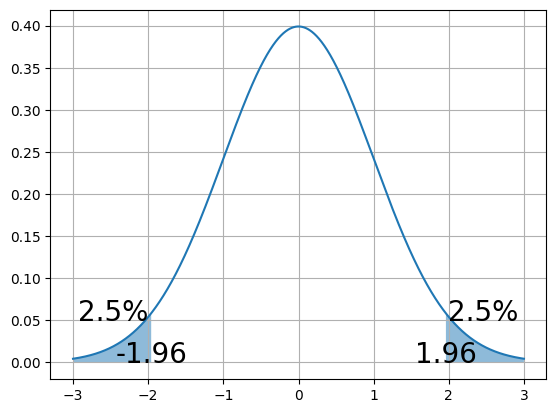

In [ ]:
# regions of rejection
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

x = np.arange(-3, 3, 0.001)

pdf = stats.norm.pdf(x,loc=0,scale=1)
plt.plot(x, pdf)

z = 1.96 # 95% CI
lci = -z
uci = z

plt.fill_between(x, pdf, where=(lci > x) | (x > uci), alpha=0.5)
plt.text(lci, 0, lci, ha='center', fontsize=20)
plt.text(uci, 0, uci, ha='center', fontsize=20)
# plt.text(-0.4, .2, f'95%', fontsize=20)
plt.text(lci-.5, 0.05, f'2.5%', ha='center', fontsize=20)
plt.text(uci+.5, 0.05, f'2.5%', ha='center', fontsize=20)
plt.grid(True)

### Neyman (1894 - 1981) and Pearson, Egon (1895 - 1980)

* Introduces error control
* Specifies null and alternative hypothesis
* Type I error
* Type II error



### Type I and Type II Errors

- Hypothesis testing is used against results that are already known
- Type I error: Reject null hypothesis that should have been supported
- $H_0$: There is no fire. Pull the fire alarm, when there is no fire
- Type II error: Fail to reject a null hypothesis that should have been rejected
- $H_0$: There is no fire. Failed to pull the fire alarm, when there is a fire

https://economics.stackexchange.com/questions/27677/type-i-error-type-ii-error-pregnancy-test-analogy-is-it-legit

### And Speaking of Errors

* Type III Error: Testing the wrong hypothesis
* Standard Error (of the mean) = $\frac{s}{\sqrt{n}}$ or $\frac{\sigma}{\sqrt{n}}$
* Sampling Error = $z * \frac{\sigma}{\sqrt{n}}$
* Margin of Error (Wikipedia) = $z * \sqrt{\frac{\sigma^2}{n}}$
* Margin of Error for a Proportion = $z * \sqrt{\frac{pq}{n}}$ where q = 1-p

### Randomized Controlled Trials

Confounding Variables

* In an observational study, if the treatment and control groups differ in ways other than the treatment, it is difficult to make conclusions about causality
* An underlying difference between the two groups (other than the treatment) is called a confounding factor, because it might confound you (that is, mess you up) when you try to reach a conclusion
* A confounding variable is a variable that is not included in an experiment but affects the relationship between two variables in the experiment. Confounding variables can distort or mask the effects of another variable on the disease in question
* Confounding variables can cause two major problems: Increase variance, Introduce bias

Blind Experiment

* If you are able to randomize individuals into the treatment and control groups, you are running a randomized controlled experiment, also known as a randomized controlled trial (RCT)
* Sometimes, people’s responses in an experiment are influenced by their knowing which group they are in
* So you might want to run a blind experiment in which individuals do not know whether they are in the treatment group or the control group
* To make this work, you will have to give the control group a **placebo**, which is something that looks exactly like the treatment but in fact has no effect

Treatment Group

* Treatment groups are also known as experimental groups. In an experiment, a treatment group receives the treatment that the researcher is interested in

Control Group

* The control group does not receive the treatment
* Instead, the control group serves as a comparison group for the treatments
* Researchers compare the results of the treatment group to the control group to determine the effect size (how much difference between the groups)

## Hypothesis Tests

### Hypothesis Testing Operators

- For a one tailed null hypothesis we see $\leq$ or $\geq$
- For a one tailed alt hypothesis we see $<$ or $>$
- For a two tailed null hypothesis we see the symbol $=$
- For a two tailed alt hypothesis we see the symbol $\ne$

**For a One Tailed Test**
- Null Hypothesis – There is no significant difference between the means of groups
- Alternate Hypothesis – There is a significant difference between the means of groups in that the mean of the group is less or greater than some x

**For a Two Tailed Test**
- Null Hypothesis – There is no significant difference between the means of groups
- Alternate Hypothesis – There is a significant difference between the means of groups either greater than x or less than x

For example,

**For a One Tailed Test**
- a null hypothesis might be $\mu_1 \geq \mu_2$,
- and the alt hypothesis would be $\mu_1 < \mu_2$

**For a Two Tailed Test**
- a null hypothesis might be $\mu_1 = \mu_2$,
- and the alt hypothesis would be $\mu_1 \ne \mu_2$

We never accept the null hypothesis, we either reject it or fail to reject it.

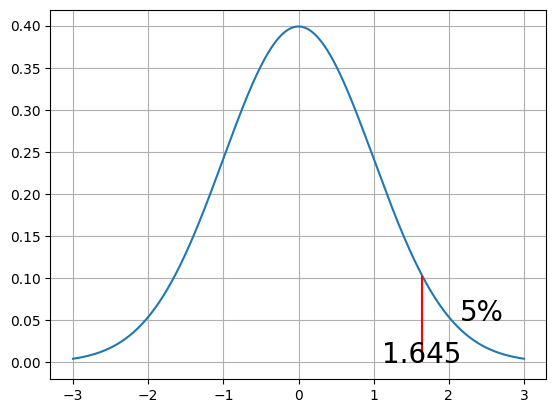

In [ ]:
# one tailed test
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

x = np.arange(-3, 3, 0.001)

pdf = stats.norm.pdf(x,loc=0,scale=1)
plt.plot(x, pdf)

z = 1.645 # 95% CI
uci = z

# plt.fill_between(x, pdf, where=(x > uci), alpha=0.5)
plt.vlines(x=z, ymin=0, ymax=stats.norm.pdf(z, loc=0, scale=1), color='red')
plt.text(uci, 0, uci, ha='center', fontsize=20)
plt.text(uci+.5, .05, f'5%', fontsize=20)
plt.grid(True)

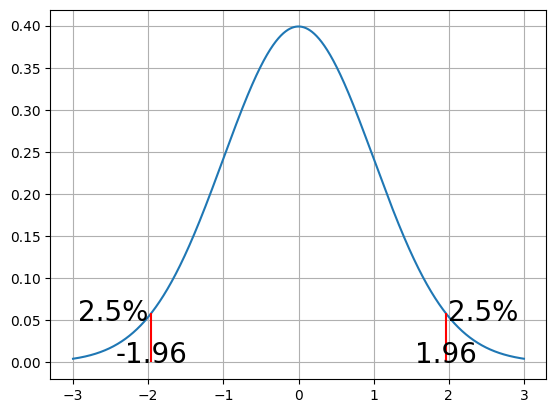

In [ ]:
# two tailed test
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

x = np.arange(-3, 3, 0.001)

pdf = stats.norm.pdf(x,loc=0,scale=1)
plt.plot(x, pdf)

z = 1.96 # 95% CI
lci = -z
uci = z

# plt.fill_between(x, pdf, where=(lci > x) | (x > uci), alpha=0.5)
plt.vlines(x=-z, ymin=0, ymax=stats.norm.pdf(-z, loc=0, scale=1), color='red')
plt.vlines(x=z, ymin=0, ymax=stats.norm.pdf(z, loc=0, scale=1), color='red')
plt.text(lci, 0, lci, ha='center', fontsize=20)
plt.text(uci, 0, uci, ha='center', fontsize=20)
# plt.text(-0.4, .2, f'95%', fontsize=20)
plt.text(lci-.5, 0.05, f'2.5%', ha='center', fontsize=20)
plt.text(uci+.5, 0.05, f'2.5%', ha='center', fontsize=20)
plt.grid(True)

Given $\alpha = 0.05$:
- Extreme values occur in one tail of a one tail test = 5%
- Extreme values occur on both tails of a two tail test = 2.5% for each tail

These areas establish our critical values (when using z, a standard normal distribution is assumed)
- For one tailed test $z = 1.645$
- For two tailed test $ z = \pm 1.960$

## Showing Type I and Type II Errors

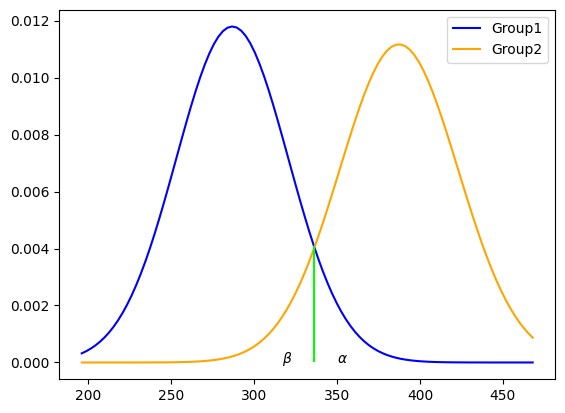

In [ ]:
# type 1 and 2 errors
# https://www.scribbr.com/statistics/type-i-and-type-ii-errors/
# https://stackoverflow.com/questions/53574569/fill-area-of-overlap-between-two-normal-distributions-in-seaborn-matplotlib

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
norm = stats.norm

group1_data = np.array([361, 291, 263, 284, 311, 284, 282, 228, 328, 263, 354, 302, 293,
       254, 297, 281, 307, 281, 262, 302, 244, 259, 273, 299, 278, 257,
       296, 237, 276, 280, 291, 278, 251, 313, 314, 323, 333, 270, 317,
       321, 307, 256, 301, 264, 221, 251, 307, 283, 300, 292, 344, 239,
       288, 356, 224, 246, 196, 202, 314, 301, 336, 294, 237, 284, 311,
       257, 255, 287, 243, 267, 253, 257, 320, 295, 295, 271, 322, 343,
       313, 293, 298, 272, 267, 257, 334, 276, 337, 325, 261, 344, 298,
       253, 302, 318, 289, 302, 291, 343, 310, 241])



group2_data = np.array([310, 315, 303, 360, 339, 416, 278, 326, 316, 314, 333, 317, 357,
       304, 363, 387, 279, 350, 367, 321, 366, 311, 308, 303, 299, 363,
       335, 357, 392, 321, 361, 285, 321, 290, 392, 341, 331, 338, 326,
       314, 327, 320, 293, 333, 297, 315, 365, 408, 352, 359, 312, 300,
       263, 358, 345, 360, 336, 378, 315, 354, 318, 300, 372, 305, 336,
       286, 296, 413, 383, 328, 418, 388, 416, 371, 313, 321, 321, 317,
       402, 290, 328, 344, 330, 319, 309, 327, 351, 324, 278, 369, 416,
       359, 381, 324, 306, 350, 385, 335, 395, 308])

group2_data += 50


group1_params = norm.fit(group1_data)
group2_params = norm.fit(group2_data)

xmin = min(group1_data.min(), group2_data.min())
xmax = max(group1_data.max(), group2_data.max())
x = np.linspace(xmin, xmax, 100)

group1_pdf = norm(*group1_params).pdf(x)
group2_pdf = norm(*group2_params).pdf(x)
y = np.minimum(group2_pdf, group1_pdf)

fig, ax = plt.subplots()
ax.plot(x, group1_pdf, label="Group1", color='blue')
ax.plot(x, group2_pdf, label="Group2", color='orange')
ax.fill_between(x, y, alpha=0)

errors = 336
plt.vlines(x=errors, ymin=0, ymax=stats.norm.pdf(errors, loc=group1_params[0], scale=group1_params[1]), color='lime')
ax.text(320, 0, r'$\beta$', ha='center', fontsize=10)
ax.text(353, 0, r'$\alpha$', ha='center', fontsize=10)
plt.legend()
plt.show()


- Type I error: Reject null hypothesis that should have been supported
- $H_0$: There is no fire. Pull the fire alarm, when there is no fire
- Denoted by $\alpha$
- Type II error: Fail to reject a null hypothesis that should have been rejected
- $H_0$: There is no fire. Failed to pull the fire alarm, when there is a fire
- Denoted by $\beta$

## Tests of Significance (Fisher)

1. Select an appropriate test, goal of interest
2. Set up null hypothesis ($H_0$)
3. Determine direction vs non-directions
4. Calculate the theoretical probabity of the results under the null, e.g. a sample mean, which also establishes the p-value
5. Assess the statistical significance of the results
6. Interpret the results

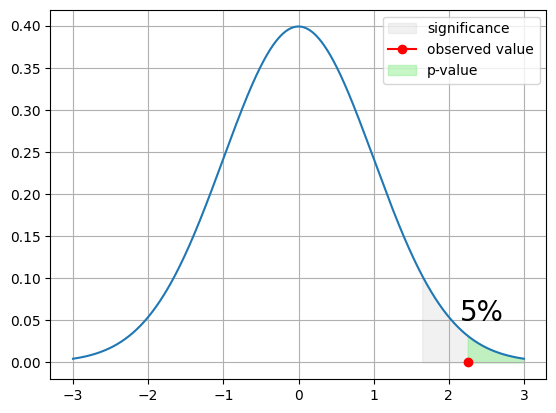

In [ ]:
# Fisher example
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

x = np.arange(-3, 3, 0.001)

pdf = stats.norm.pdf(x,loc=0,scale=1)
plt.plot(x, pdf)

z = 1.645 # 95% CI
uci = z

plt.fill_between(x, pdf, where=(x > uci), alpha=0.3, color='lightgray', label='significance')
# plt.vlines(x=z, ymin=0, ymax=stats.norm.pdf(z, loc=0, scale=1), color='gray')
# plt.text(uci, -0.05, uci, ha='center', fontsize=20)
o = 2.25
plt.plot(o, 0, marker='o', color='red', label='observed value')
p = o
plt.fill_between(x, pdf, where=(x > p), alpha=0.5, color='lightgreen', label='p-value')
plt.text(uci+.5, .05, f'5%', fontsize=20)
plt.legend()
plt.grid(True)

### Test of Means

* https://www.statology.org/hypothesis-test-python/
* Example: Calculating a t value knowing the pearson's r. The weight and length of 10 newborns has a Pearson correlation coefficient of .47. Since we know that n = 10 and r = .47, we can calculate the t value: https://www.scribbr.com/statistics/pearson-correlation-coefficient/

### Test Statistic vs Critical Value

In order to make a decision whether to reject the null hypothesis a test statistic is calculated and compared to the critical value. The decision is made on the basis of the numerical value of the test statistic. There are two approaches how to derive at that decision: The critical value approach and the p-value approach.

https://www.geo.fu-berlin.de/en/v/soga/Basics-of-statistics/Hypothesis-Tests/Introduction-to-Hypothesis-Testing/Critical-Value-and-the-p-Value-Approach/index.html

Critical value example:

* 1.96 - if the test statistic is greater than the critical value we reject the null

### Critical Values

A critical value is based on a pre-decided significance level. A significance level or level of significance or statistical significance is defined as the probability that the calculated test statistic will fall in the critical region

In [ ]:
# one tail vs two tail
from scipy import stats

a = 0.05
print(f'One-tailed test: {np.round(np.abs(stats.norm.ppf(a)), 3)}')
print(f'Two-tailed test: {np.round(np.abs(stats.norm.ppf(a/2)), 3)}')

One-tailed test: 1.645
Two-tailed test: 1.96


### The Student's t-Statistic (A Test Statistic)

* Developed by William Gosset in 1908 while working at the Guiness brewery but couldn't use his name, his employer preferred staff to use pen names when publishing scientific papers
* Used to determine how far the statistic is from 0 (the mean) in respect to standard errors
* The standard deviation reflects variability within a sample, while the standard error estimates the variability across samples of a population https://www.scribbr.com/statistics/standard-error/
* Standard error of the mean (SEM) measures how far the sample mean (average) of the data is likely to be from the true population mean. The SEM is always smaller than the SD. https://www.investopedia.com/ask/answers/042415/what-difference-between-standard-error-means-and-standard-deviation.asp
* The standard deviation of sample means, is called the standard error. The standard error tells you how accurate the mean of any given sample from that population is likely to be compared to the true population mean. When the standard error increases, i.e. the means are more spread out, it becomes more likely that any given mean is an inaccurate representation of the true population mean. https://s4be.cochrane.org/blog/2018/09/26/a-beginners-guide-to-standard-deviation-and-standard-error/
* Given a t-value and the sample size, software can provide a precise p-value
* For large samples, t-values +- 2 standard errors corresponds to p-value < 0.05

### t-Test

- When we use z scores with a normal distribution, we have to know the population's standard deviation
- Student's T-Distribution developed by William Sealy Gossett while working at Guinness Brewery but couldn't use his name
- Student's t-test determines if there is a significant difference between two sets of data
- Can't just compare means due to variance and outliers
- t-test also considers sample variances


### One Sample t Test

- We don't know the population standard deviation
- Tests null hypothesis that population mean is equal to a specified $\mu$ based on a sample mean $\bar{x}$
- $H_0$: Sample mean = Population mean

t-statistic:
- $t = \frac{\bar{x} - \mu}{s/\sqrt{n}}$
- s = sample standard error

In [ ]:
# one sample t test
from scipy import stats

rvs = stats.uniform.rvs(size=50)
stats.ttest_1samp(rvs, popmean=0.5)

TtestResult(statistic=-1.5483589738077446, pvalue=0.1279710325396576, df=49)

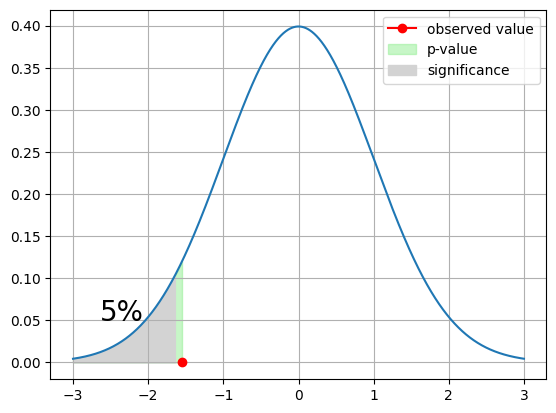

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

x = np.arange(-3, 3, 0.001)

pdf = stats.norm.pdf(x,loc=0,scale=1)
plt.plot(x, pdf)

z = -1.645 # 95% CI
uci = z

# plt.vlines(x=z, ymin=0, ymax=stats.norm.pdf(z, loc=0, scale=1), color='gray')
# plt.text(uci, -0.05, uci, ha='center', fontsize=20)
o = -1.55
plt.plot(o, 0, marker='o', color='red', label='observed value')
p = o
plt.fill_between(x, pdf, where=(x < p), alpha=0.5, color='lightgreen', label='p-value')
plt.fill_between(x, pdf, where=(x < uci), color='lightgray', label='significance')
plt.text(uci-1, .05, f'5%', fontsize=20)
plt.legend()
plt.grid(True)

### Independent Two-Sample t-Test

- $H_0$: $\bar{x_1} = \bar{x_2}$
- Are the means of two groups the same?

t-statistic can have:
- equal sample sizes, equal variance
- unequal sample sizes, equal variance
- equal of unequal sample sizes, unequal variance (Welch's t-test)

t = signal/noise = difference in means/sample variability = $\frac{(\bar{x_1} - \bar{x_2})}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$

Compared to a t-score:
- $t$ = t-statistic
- $t_{df, \alpha}$ = t-critical
- df = degrees of freedom
- General formula for df = n1 + n2 - 2 for equal variance or
- Also see Welch-Satterthwaite Formula
- $\alpha$ = significance level

### t-Test Example

There are two classes of 10 students each with their course total points
- $H_0: \mu_1 \leq \mu_2$
- $H_a: \mu_1 \gt \mu_2$
- Find the mean
- Find the variance
- Compute the t-value: $\frac{(\bar{x_1} - \bar{x_2})}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$


In [ ]:
import random
import numpy as np
from scipy import stats

class1 = [random.randint(90, 100) for i in range(10)]
class2 = [random.randint(91, 101) for i in range(10)]

print('Is the difference in means statistically different?', np.mean(class1) - np.mean(class2))

print(stats.ttest_ind(class1, class2))

Is the difference in means statistically different? -0.4000000000000057
TtestResult(statistic=-0.27588029392302565, pvalue=0.7857823738698574, df=18.0)


In [ ]:
# independent ttest example 2
for x in range(1, 10):
  group2 = [random.randint(90 - x, 100 - x) for i in range(10)]
  print(x, np.mean(group1 - np.mean(group2)))
  print(stats.ttest_ind(group1, group2))

Is the difference in means statistically different? 6.700000000000003
TtestResult(statistic=5.2949768662270165, pvalue=4.925120525339106e-05, df=18.0)


### Dependent Paired-Sample t-Test

- Used when the 2 samples are dependent
- Repeated measures
- Means of before and after learning

### Tests of Means vs Tests of Proportion

Test of means (comparing means of groups):
- $z = \frac{\bar{x} - \mu}{\sigma/\sqrt{n}}$
- z assumes we know the population standard deviation
- t is used when we don't know the population standard deviation
- $t = \frac{\bar{x1} - \bar{x2}}{s/\sqrt{n}}$

Test of proportions (saying like 75%, or most, of the time):
- $z = \frac{\hat{p} - p}{\sqrt{\frac{p (1 - p)}{n}}}$

### Test Statistics

- z-tests uses the z statistic as the test statistic
- t-tests uses the t statistic as the test statistic
- ANOVA uses the f statistic as the test statistic

### Example
- Set the level of significance
- Calculate the critical value
- Compare test statistic to the critical value

### P-Value Test

For a p value test:
* Get the test statistic
* Use it to determine the p-value
* Compare the p-value to the level of significance
* If the p-value is low the null must go! Reject $H_0$
* If the p-value is high the null must fly! Fail to reject $H_0$

### Misuse of P-Value

"The general definition of a P value may help one to understand why statistical tests tell us much less than what many think they do: Not only does a P value not tell us whether the hypothesis targeted for testing is true or not; it says nothing specifically related to that hypothesis unless we can be completely assured that every other assumption used for its computation is correct—an assurance that is lacking in far too many studies."

Greenland, S., Senn, S. J., Rothman, K. J., Carlin, J. B., Poole, C., Goodman, S. N., & Altman, D. G. (2016). Statistical tests, P values, confidence intervals, and power: a guide to misinterpretations. European journal of epidemiology, 31(4), 337–350. https://doi.org/10.1007/s10654-016-0149-3

* P-Hacking

Data dredging (also known as data snooping or p-hacking) is the misuse of data analysis to find patterns in data that can be presented as statistically significant, thus dramatically increasing and understating the risk of false positives. This is done by performing many statistical tests on the data and only reporting those that come back with significant results.

https://en.wikipedia.org/wiki/Data_dredging

The following list clarifies some issues that are commonly misunderstood regarding p-values:

* The p-value is not the probability that the null hypothesis is true, or the probability that the alternative hypothesis is false. A p-value can indicate the degree of compatibility between a dataset and a particular hypothetical explanation (such as a null hypothesis). Specifically, the p-value can be taken as the prior probability of obtaining an effect that is at least as extreme as the observed effect, given that the null hypothesis is true. This should not be confused with the posterior probability that the null hypothesis is true given the observed effect (see prosecutor's fallacy). In fact, frequentist statistics does not attach probabilities to hypotheses.
* The p-value is not the probability that the observed effects were produced by random chance alone. The p-value is computed under the assumption that a certain model, usually the null hypothesis, is true. This means that the p-value is a statement about the relation of the data to that hypothesis.
* The 0.05 significance level is merely a convention. The 0.05 significance level (alpha level) is often used as the boundary between a statistically significant and a statistically non-significant p-value. However, this does not imply that there is generally a scientific reason to consider results on opposite sides of any threshold as qualitatively different.
* The p-value does not indicate the size or importance of the observed effect. A small p-value can be observed for an effect that is not meaningful or important. In fact, the larger the sample size, the smaller the minimum effect needed to produce a statistically significant p-value (see effect size). Visualizing effect sizes is a critical component of a data-analysis method called estimation statistics.

https://en.wikipedia.org/wiki/Misuse_of_p-values

READ THIS: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5738950/

### SF (Survival Function)

* Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
* The survival function is a function that gives the probability that a patient, device, or other object of interest will survive past a certain time
* https://en.wikipedia.org/wiki/Survival_function

In [ ]:
# compare p values given z left tail
import scipy.stats as stats

print('z=-1.65: ', stats.norm.cdf(-1.65)) # reject the null
print('z=-1.64: ', stats.norm.cdf(-1.64)) # fail to reject the null

z=-1.65:  0.0494714680336481
z=-1.64:  0.05050258347410371


In [ ]:
# find p value given two tail
stats.norm.sf(abs(1.5))*2
# fail to reject with z = 1.5

0.13361440253771614

### I Want My Pizza

Pizza delivery takes, on average, 31 minutes with a standard deviation of 7 minutes. We want faster delivery times so we provide bonuses to drivers that deliver under 30 minutes. We take a sample of size 40 of these new deliveries and find that the mean of the sample = 28. We want the confidence level to be 95%.

- State the null hypothesis: $H_0: \mu \geq 31$
- State the alternative hypothesis: $H_a: \mu \lt 31$
- Determine test type (left tail, right tail, two tail)
- Since we want an improved outcome this will be one tailed left
- $z = \frac{\bar{x} - \mu}{\sigma/\sqrt{n}}$

In [ ]:
# find test statistic from our formula
import numpy as np

test_statistic = (28 - 31) / (7/np.sqrt(40))
np.round(test_statistic, 3)

-2.711

In [ ]:
# find critical value
from scipy import stats

critical_value = stats.norm.ppf(0.05)
np.round(critical_value, 3)

-1.645

In [ ]:
# p-value approach using survival function
import scipy.stats as stats

np.round(stats.norm.sf(abs(test_statistic)), 3)

0.003

0.003 < 0.05